In [1]:
# files/modules
from env import host, user, password
import acquire as a

# manipulations
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

## Acquire
'Basic' columns and then all of the columns for Zillow data (that meets parameters)

In [2]:
zillow = a.basic_acquire_zillow()

Acquiring data from SQL db


In [3]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   52441 non-null  float64
 1   bathrooms  52441 non-null  float64
 2   area       52359 non-null  float64
 3   tax_value  52440 non-null  float64
dtypes: float64(4)
memory usage: 1.6 MB


In [4]:
zillow_l = a.larger_acquire_zillow()

Acquiring data from SQL db


In [5]:
zillow_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52441 non-null  int64  
 1   propertylandusetypeid         52441 non-null  float64
 2   id                            52441 non-null  int64  
 3   airconditioningtypeid         13638 non-null  float64
 4   architecturalstyletypeid      70 non-null     float64
 5   basementsqft                  47 non-null     float64
 6   bathroomcnt                   52441 non-null  float64
 7   bedroomcnt                    52441 non-null  float64
 8   buildingclasstypeid           0 non-null      object 
 9   buildingqualitytypeid         33740 non-null  float64
 10  calculatedbathnbr             52304 non-null  float64
 11  decktypeid                    389 non-null    float64
 12  finishedfloor1squarefeet      4381 non-null   float64
 13  c

## Preparation/Splitting


In [8]:
# looking at null counts
zillow.isnull().sum()

bedrooms      0
bathrooms     0
area         82
tax_value     1
dtype: int64

In [9]:
zillow_l.isnull().sum()

parcelid                        0
propertylandusetypeid           0
id                              0
airconditioningtypeid       38803
architecturalstyletypeid    52371
                            ...  
censustractandblock           123
propertylandusedesc             0
id                              0
logerror                        0
transactiondate                 0
Length: 63, dtype: int64

In [10]:
# The nulls for aircondition and architecture are so large, going to drop columns entirely. Also dropping 
# landtaxvaluedollarcnt, structuretaxvaluedollarcnt, and taxamount for target variable (taxvaluedollarcnt) integrity.

In [11]:
zillow_l = zillow_l.drop(columns= ['airconditioningtypeid', 'architecturalstyletypeid', 'landtaxvaluedollarcnt',
                                  'structuretaxvaluedollarcnt', 'taxamount'])

In [30]:
nulls_tax = zillow[zillow.tax_value.isna()]

In [32]:
nulls_area = zillow[zillow.area.isna()]

In [36]:
nulls_area.value_counts(dropna=False)

bedrooms  bathrooms  area  tax_value
0.0       0.0        NaN   5346951.0    2
                           7771.0       1
                           3136161.0    1
                           2979077.0    1
                           2909706.0    1
                                       ..
                           544456.0     1
                           468439.0     1
                           422962.0     1
                           406100.0     1
5.0       4.5        NaN   1461048.0    1
Length: 81, dtype: int64

In [37]:
nulls_area.head(30)

,bedrooms,bathrooms,area,tax_value
124,0.0,0.0,NaN,830145.0
3322,0.0,0.0,NaN,643406.0
4465,2.0,1.0,NaN,488078.0
4605,0.0,0.0,NaN,2909706.0
5065,0.0,0.0,NaN,5080924.0
5379,0.0,0.0,NaN,2979077.0
5558,0.0,0.0,NaN,178684.0
5767,0.0,0.0,NaN,6900769.0
6592,0.0,0.0,NaN,375218.0
7350,0.0,0.0,NaN,2504615.0


In [38]:
zillow = zillow.dropna()

In [39]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52358 entries, 0 to 52440
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   52358 non-null  float64
 1   bathrooms  52358 non-null  float64
 2   area       52358 non-null  float64
 3   tax_value  52358 non-null  float64
dtypes: float64(4)
memory usage: 2.0 MB


In [40]:
# The nulls were largely from 0s in multiple columns, so dropped all nulls. Did not consider
# worth imputing the data. Was also a very small portion of the total dataset.

In [41]:
zillow.isnull().sum()

bedrooms     0
bathrooms    0
area         0
tax_value    0
dtype: int64

In [42]:
zillow.bedrooms.value_counts()

3.0     23359
4.0     15239
2.0      8336
5.0      3972
6.0       635
1.0       609
7.0       106
0.0        63
8.0        24
9.0         8
12.0        3
10.0        2
14.0        1
11.0        1
Name: bedrooms, dtype: int64

In [43]:
zillow.bathrooms.value_counts()

2.0     21892
3.0     10673
1.0      9562
2.5      3934
4.0      2227
3.5       918
1.5       840
5.0       803
4.5       686
6.0       322
5.5       224
7.0        88
8.0        53
6.5        47
0.0        47
7.5        16
9.0        13
10.0        5
11.0        3
8.5         3
18.0        1
13.0        1
Name: bathrooms, dtype: int64

In [49]:
zillow[zillow.area == 0]

,bedrooms,bathrooms,area,tax_value


In [52]:
zillow[zillow.tax_value == 0]

,bedrooms,bathrooms,area,tax_value


In [54]:
# Some visualizations of columns

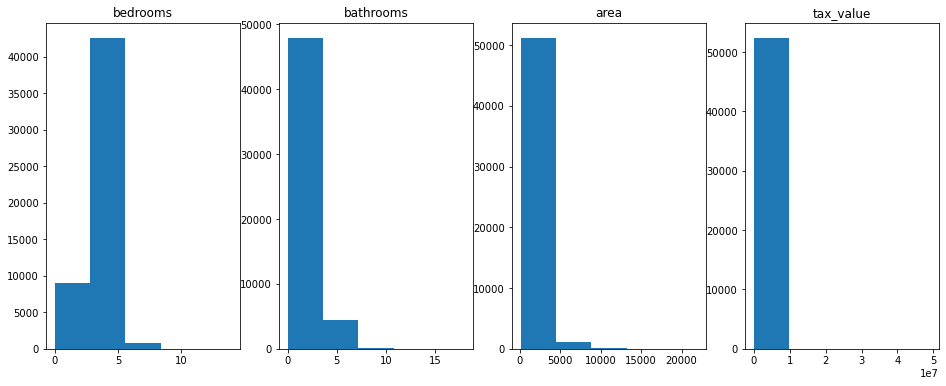

In [57]:
cols = [col for col in zillow.columns]
plt.figure(figsize=(16,6))
for i, col in enumerate(cols):
    plot_number = i + 1
    plt.subplot(1, len(cols), plot_number)
    plt.title(col)
    zillow[col].hist(bins=5)
    plt.grid(False)
    plt.ticklabel_format(useOffset=False)
    
plt.show()

In [58]:
zillow.tax_value.head()

0    1023282.0
1     464000.0
2     564778.0
3     145143.0
4     773303.0
Name: tax_value, dtype: float64

In [60]:
zillow_l.isnull().sum()

parcelid                            0
propertylandusetypeid               0
id                                  0
basementsqft                    52394
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             52441
buildingqualitytypeid           18701
calculatedbathnbr                 137
decktypeid                      52052
finishedfloor1squarefeet        48060
calculatedfinishedsquarefeet       82
finishedsquarefeet12              247
finishedsquarefeet13            52441
finishedsquarefeet15            52441
finishedsquarefeet50            48060
finishedsquarefeet6             52276
fips                                0
fireplacecnt                    45198
fullbathcnt                       137
garagecarcnt                    34426
garagetotalsqft                 34426
hashottuborspa                  50926
heatingorsystemtypeid           18506
latitude                            0
longitude                           0
lotsizesquar

In [76]:
for col in cols:
    print(zillow_l[col].isna().sum() >= (.25 * zillow_l[col].count()))

False
False
id    False
id    False
dtype: bool
True
False
False
True
True
False
True
True
False
False
True
True
True
True
False
True
False
True
True
True
True
False
False
False
True
True
True
True
True
False
True
False
False
False
True
False
False
True
True
True
True
True
True
False
True
True
False
False
True
True
False
False
id    False
id    False
dtype: bool
False
False


In [100]:
for col in zillow_l:
    if zillow_l[col].isna().sum() >= (.25 * len(zillow_l)):
        zillow_l = zillow_l.drop(columns = col)

In [101]:
zillow_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52441 non-null  int64  
 1   propertylandusetypeid         52441 non-null  float64
 2   bathroomcnt                   52441 non-null  float64
 3   bedroomcnt                    52441 non-null  float64
 4   calculatedbathnbr             52304 non-null  float64
 5   calculatedfinishedsquarefeet  52359 non-null  float64
 6   finishedsquarefeet12          52194 non-null  float64
 7   fips                          52441 non-null  float64
 8   fullbathcnt                   52304 non-null  float64
 9   latitude                      52441 non-null  float64
 10  longitude                     52441 non-null  float64
 11  lotsizesquarefeet             52072 non-null  float64
 12  propertycountylandusecode     52441 non-null  object 
 13  r

In [92]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52358 entries, 0 to 52440
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   52358 non-null  float64
 1   bathrooms  52358 non-null  float64
 2   area       52358 non-null  float64
 3   tax_value  52358 non-null  float64
dtypes: float64(4)
memory usage: 2.0 MB


In [98]:
zillow_l = zillow_l.drop(columns = 'id')

KeyError: "['id'] not found in axis"

In [102]:
zillow_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52441 non-null  int64  
 1   propertylandusetypeid         52441 non-null  float64
 2   bathroomcnt                   52441 non-null  float64
 3   bedroomcnt                    52441 non-null  float64
 4   calculatedbathnbr             52304 non-null  float64
 5   calculatedfinishedsquarefeet  52359 non-null  float64
 6   finishedsquarefeet12          52194 non-null  float64
 7   fips                          52441 non-null  float64
 8   fullbathcnt                   52304 non-null  float64
 9   latitude                      52441 non-null  float64
 10  longitude                     52441 non-null  float64
 11  lotsizesquarefeet             52072 non-null  float64
 12  propertycountylandusecode     52441 non-null  object 
 13  r

In [103]:
zillow_l.isnull().sum()

parcelid                           0
propertylandusetypeid              0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                137
calculatedfinishedsquarefeet      82
finishedsquarefeet12             247
fips                               0
fullbathcnt                      137
latitude                           0
longitude                          0
lotsizesquarefeet                369
propertycountylandusecode          0
rawcensustractandblock             0
regionidcity                    1037
regionidcounty                     0
regionidzip                       26
roomcnt                            0
yearbuilt                        116
taxvaluedollarcnt                  1
assessmentyear                     0
censustractandblock              123
propertylandusedesc                0
logerror                           0
transactiondate                    0
dtype: int64

In [104]:
# The amount of NaN values is a small % of total rows, or redundant in nature (regionidcity). Will drop all NaNs
zillow_l = zillow_l.dropna()

In [105]:
zillow_l.isnull().sum()

parcelid                        0
propertylandusetypeid           0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
taxvaluedollarcnt               0
assessmentyear                  0
censustractandblock             0
propertylandusedesc             0
logerror                        0
transactiondate                 0
dtype: int64

In [106]:
zillow_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50735 entries, 0 to 52440
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      50735 non-null  int64  
 1   propertylandusetypeid         50735 non-null  float64
 2   bathroomcnt                   50735 non-null  float64
 3   bedroomcnt                    50735 non-null  float64
 4   calculatedbathnbr             50735 non-null  float64
 5   calculatedfinishedsquarefeet  50735 non-null  float64
 6   finishedsquarefeet12          50735 non-null  float64
 7   fips                          50735 non-null  float64
 8   fullbathcnt                   50735 non-null  float64
 9   latitude                      50735 non-null  float64
 10  longitude                     50735 non-null  float64
 11  lotsizesquarefeet             50735 non-null  float64
 12  propertycountylandusecode     50735 non-null  object 
 13  r

In [115]:
zillow_l.bedroomcnt.value_counts()

3.0     22880
4.0     14723
2.0      8073
5.0      3758
6.0       603
1.0       536
7.0       101
0.0        27
8.0        23
9.0         8
10.0        2
11.0        1
Name: bedroomcnt, dtype: int64

In [120]:
zillow_l.transactiondate.value_counts()

2017-06-30    780
2017-04-28    594
2017-05-31    550
2017-07-28    527
2017-08-31    514
             ... 
2017-05-07      1
2017-05-13      1
2017-05-20      1
2017-06-11      1
2017-09-25      1
Name: transactiondate, Length: 257, dtype: int64

In [121]:
zillow_l = zillow_l.drop(columns = ['parcelid', 'propertylandusetypeid', 'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt',
                            'latitude', 'longitude', 'propertycountylandusecode', 'rawcensustractandblock',
                            'roomcnt', 'regionidzip', 'assessmentyear', 'censustractandblock', 'logerror'])

In [122]:
zillow_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50735 entries, 0 to 52440
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   50735 non-null  float64
 1   bedroomcnt                    50735 non-null  float64
 2   calculatedfinishedsquarefeet  50735 non-null  float64
 3   fips                          50735 non-null  float64
 4   lotsizesquarefeet             50735 non-null  float64
 5   regionidcity                  50735 non-null  float64
 6   regionidcounty                50735 non-null  float64
 7   yearbuilt                     50735 non-null  float64
 8   taxvaluedollarcnt             50735 non-null  float64
 9   propertylandusedesc           50735 non-null  object 
 10  transactiondate               50735 non-null  object 
dtypes: float64(9), object(2)
memory usage: 4.6+ MB


In [124]:
zillow_l = zillow_l.drop(columns = 'propertylandusedesc')

In [128]:
zillow_l.regionidcity.nunique()

175

In [142]:
zillow_l.regionidcity.value_counts(ascending=False)

12447.0    11338
5534.0      1762
40227.0     1486
46298.0     1424
16764.0     1070
           ...  
32927.0        3
31134.0        2
36078.0        1
10815.0        1
21395.0        1
Name: regionidcity, Length: 175, dtype: int64

In [132]:
zillow_l.regionidcounty.value_counts()

3101.0    32875
1286.0    13529
2061.0     4331
Name: regionidcounty, dtype: int64

In [137]:
zillow_l = zillow_l.drop(columns = 'regionidcounty')

In [138]:
zillow_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50735 entries, 0 to 52440
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   50735 non-null  float64
 1   bedroomcnt                    50735 non-null  float64
 2   calculatedfinishedsquarefeet  50735 non-null  float64
 3   fips                          50735 non-null  float64
 4   lotsizesquarefeet             50735 non-null  float64
 5   regionidcity                  50735 non-null  float64
 6   yearbuilt                     50735 non-null  float64
 7   taxvaluedollarcnt             50735 non-null  float64
 8   transactiondate               50735 non-null  object 
dtypes: float64(8), object(1)
memory usage: 3.9+ MB


In [139]:
zillow_l.lotsizesquarefeet.head()

0     4506.0
1    12647.0
2     8432.0
3    13038.0
4    63000.0
Name: lotsizesquarefeet, dtype: float64

In [140]:
zillow_l.calculatedfinishedsquarefeet.head()

0    3100.0
1    1465.0
2    1243.0
3    2376.0
4    2962.0
Name: calculatedfinishedsquarefeet, dtype: float64

In [143]:
zillow_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50735 entries, 0 to 52440
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   50735 non-null  float64
 1   bedroomcnt                    50735 non-null  float64
 2   calculatedfinishedsquarefeet  50735 non-null  float64
 3   fips                          50735 non-null  float64
 4   lotsizesquarefeet             50735 non-null  float64
 5   regionidcity                  50735 non-null  float64
 6   yearbuilt                     50735 non-null  float64
 7   taxvaluedollarcnt             50735 non-null  float64
 8   transactiondate               50735 non-null  object 
dtypes: float64(8), object(1)
memory usage: 3.9+ MB


### My acquire/prep exploration was becoming too time consuming so I needed to consolidate it and move on. 

In [2]:
z = a.acquire_zillow()

Using cached csv


In [3]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    52441 non-null  float64
 1   bathrooms   52441 non-null  float64
 2   house_area  52359 non-null  float64
 3   lot_area    52072 non-null  float64
 4   fips        52441 non-null  float64
 5   yearbuilt   52325 non-null  float64
 6   tax_value   52440 non-null  float64
dtypes: float64(7)
memory usage: 2.8 MB


In [4]:
z.head()

,bedrooms,bathrooms,house_area,lot_area,fips,yearbuilt,tax_value
0,4.0,3.5,3100.0,4506.0,6059.0,1998.0,1023282.0
1,2.0,1.0,1465.0,12647.0,6111.0,1967.0,464000.0
2,3.0,2.0,1243.0,8432.0,6059.0,1962.0,564778.0
3,4.0,3.0,2376.0,13038.0,6037.0,1970.0,145143.0
4,4.0,3.0,2962.0,63000.0,6037.0,1950.0,773303.0


In [5]:
z.isnull().sum()

bedrooms        0
bathrooms       0
house_area     82
lot_area      369
fips            0
yearbuilt     116
tax_value       1
dtype: int64

In [6]:
z = z.dropna()

In [7]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51959 entries, 0 to 52440
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    51959 non-null  float64
 1   bathrooms   51959 non-null  float64
 2   house_area  51959 non-null  float64
 3   lot_area    51959 non-null  float64
 4   fips        51959 non-null  float64
 5   yearbuilt   51959 non-null  float64
 6   tax_value   51959 non-null  float64
dtypes: float64(7)
memory usage: 3.2 MB


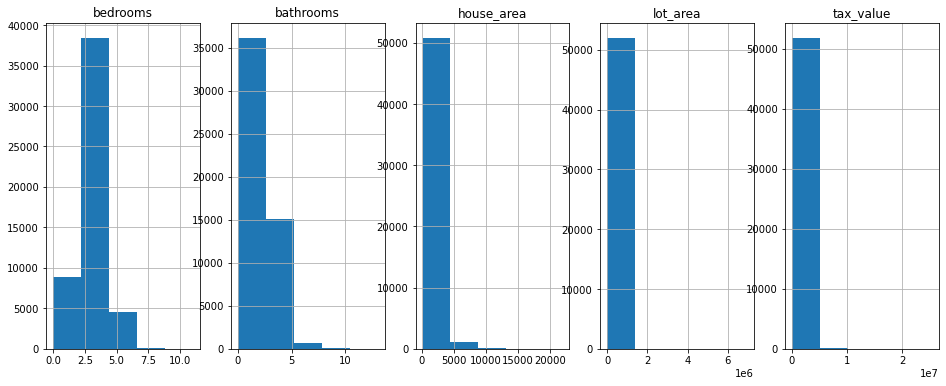

In [8]:
plt.figure(figsize=(16,6))
cols = [col for col in z.columns if col not in ['fips', 'yearbuilt']]

for i, col in enumerate(cols):
    plot_number = i + 1
    plt.subplot(1, len(cols), plot_number)
    plt.title(col)
    z[col].hist(bins=5)
    plt.ticklabel_format(useOffset=False)
plt.show()

In [9]:
# There are outliers that are causing severe skew in the data. It makes sense to remove them to give us a better 
# sense of what is normal for the data, and will serve the purpose of creating a model for predictions. 

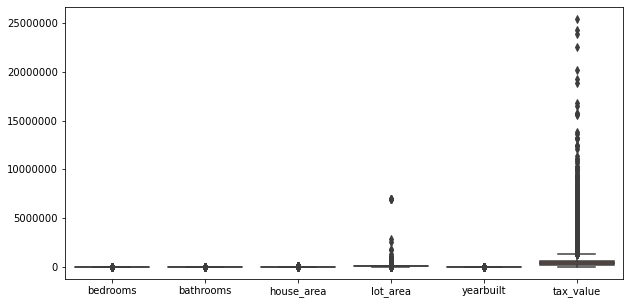

In [10]:
plt.figure(figsize=(10,5))
plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(data=z.drop(columns=['fips']))
plt.show()

In [12]:
# Boxplots highlights the issue of outliers, especially in tax_value (target variable)

In [13]:
# Need to change datatype of fips and yearbuilt to objects
z.fips = z.fips.astype(object)
z.yearbuilt = z.yearbuilt.astype(object)

In [14]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51959 entries, 0 to 52440
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    51959 non-null  float64
 1   bathrooms   51959 non-null  float64
 2   house_area  51959 non-null  float64
 3   lot_area    51959 non-null  float64
 4   fips        51959 non-null  object 
 5   yearbuilt   51959 non-null  object 
 6   tax_value   51959 non-null  float64
dtypes: float64(5), object(2)
memory usage: 3.2+ MB


In [15]:
# Now for removal of outliers
def remove_outliers(df, k, cols):
    for col in cols:
        q1, q3 = df[col].quantile([.25, .75])
        iqr = q3 - q1
        upper_bound = q3 + k * iqr
        lower_bound = q1 - k * iqr
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        return df

In [17]:
z = remove_outliers(z, 1.5, ['bedrooms', 'bathrooms', 'house_area', 'lot_area', 'tax_value'])

In [18]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50562 entries, 0 to 52440
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    50562 non-null  float64
 1   bathrooms   50562 non-null  float64
 2   house_area  50562 non-null  float64
 3   lot_area    50562 non-null  float64
 4   fips        50562 non-null  object 
 5   yearbuilt   50562 non-null  object 
 6   tax_value   50562 non-null  float64
dtypes: float64(5), object(2)
memory usage: 3.1+ MB


In [19]:
z.isnull().sum()

bedrooms      0
bathrooms     0
house_area    0
lot_area      0
fips          0
yearbuilt     0
tax_value     0
dtype: int64

In [20]:
z.yearbuilt.value_counts()

1955.0    1875
1950.0    1572
1954.0    1495
1953.0    1469
1956.0    1365
          ... 
1897.0       1
1878.0       1
1882.0       1
1894.0       1
1880.0       1
Name: yearbuilt, Length: 132, dtype: int64

In [5]:
import prepare as p

In [6]:
z = a.acquire_zillow()

Using cached csv


In [7]:
z.head()

,bedrooms,bathrooms,house_area,lot_area,fips,yearbuilt,tax_value
0,4.0,3.5,3100.0,4506.0,6059.0,1998.0,1023282.0
1,2.0,1.0,1465.0,12647.0,6111.0,1967.0,464000.0
2,3.0,2.0,1243.0,8432.0,6059.0,1962.0,564778.0
3,4.0,3.0,2376.0,13038.0,6037.0,1970.0,145143.0
4,4.0,3.0,2962.0,63000.0,6037.0,1950.0,773303.0


In [8]:
train, validate, test = p.prepare_zillow(z)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/brandynwaterman/codeup-data-science/regression_project/prepare.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = 2017 - df.yearbuilt


In [6]:
train.shape, validate.shape, test.shape

((23021, 9), (9867, 9), (8222, 9))

In [7]:
train.isnull().sum()

bedrooms      0
bathrooms     0
house_area    0
lot_area      0
tax_value     0
age           0
fips_06037    0
fips_06059    0
fips_06111    0
dtype: int64

In [8]:
train.head()

,bedrooms,bathrooms,house_area,lot_area,tax_value,age,fips_06037,fips_06059,fips_06111
32986,3.0,2.0,1291.0,6904.0,411175.0,20,1,0,0
41481,4.0,3.0,2235.0,7891.0,181755.0,28,1,0,0
20796,3.0,2.0,1865.0,5523.0,286479.0,91,1,0,0
14822,4.0,2.0,1358.0,6300.0,424302.0,55,0,0,1
24148,3.0,2.5,2463.0,7306.0,610000.0,13,0,0,1


In [9]:
train, validate, test = p.scale_zillow(train, validate, test)

In [10]:
train.head()

,bedrooms,bathrooms,house_area,lot_area,tax_value,age,fips_06037,fips_06059,fips_06111
32986,0.333333,0.333333,0.298669,0.500267,411175.0,0.137681,1,0,0
41481,0.666667,0.666667,0.590839,0.588251,181755.0,0.195652,1,0,0
20796,0.333333,0.333333,0.476323,0.377162,286479.0,0.652174,1,0,0
14822,0.666667,0.333333,0.319406,0.446425,424302.0,0.391304,0,0,1
24148,0.333333,0.500000,0.661405,0.536103,610000.0,0.086957,0,0,1


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23021 entries, 32986 to 43664
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    23021 non-null  float64
 1   bathrooms   23021 non-null  float64
 2   house_area  23021 non-null  float64
 3   lot_area    23021 non-null  float64
 4   tax_value   23021 non-null  float64
 5   age         23021 non-null  float64
 6   fips_06037  23021 non-null  uint8  
 7   fips_06059  23021 non-null  uint8  
 8   fips_06111  23021 non-null  uint8  
dtypes: float64(6), uint8(3)
memory usage: 1.3 MB


In [9]:
# Some visualization prior to scaling

In [20]:
cats = [col for col in train.columns if (train[col].dtype not in ['float', 'int'])]

In [21]:
cats

['fips_06037', 'fips_06059', 'fips_06111']

In [22]:
conts = [col for col in train.columns if (col not in cats)]

In [23]:
conts

['bedrooms', 'bathrooms', 'house_area', 'lot_area', 'tax_value', 'age']

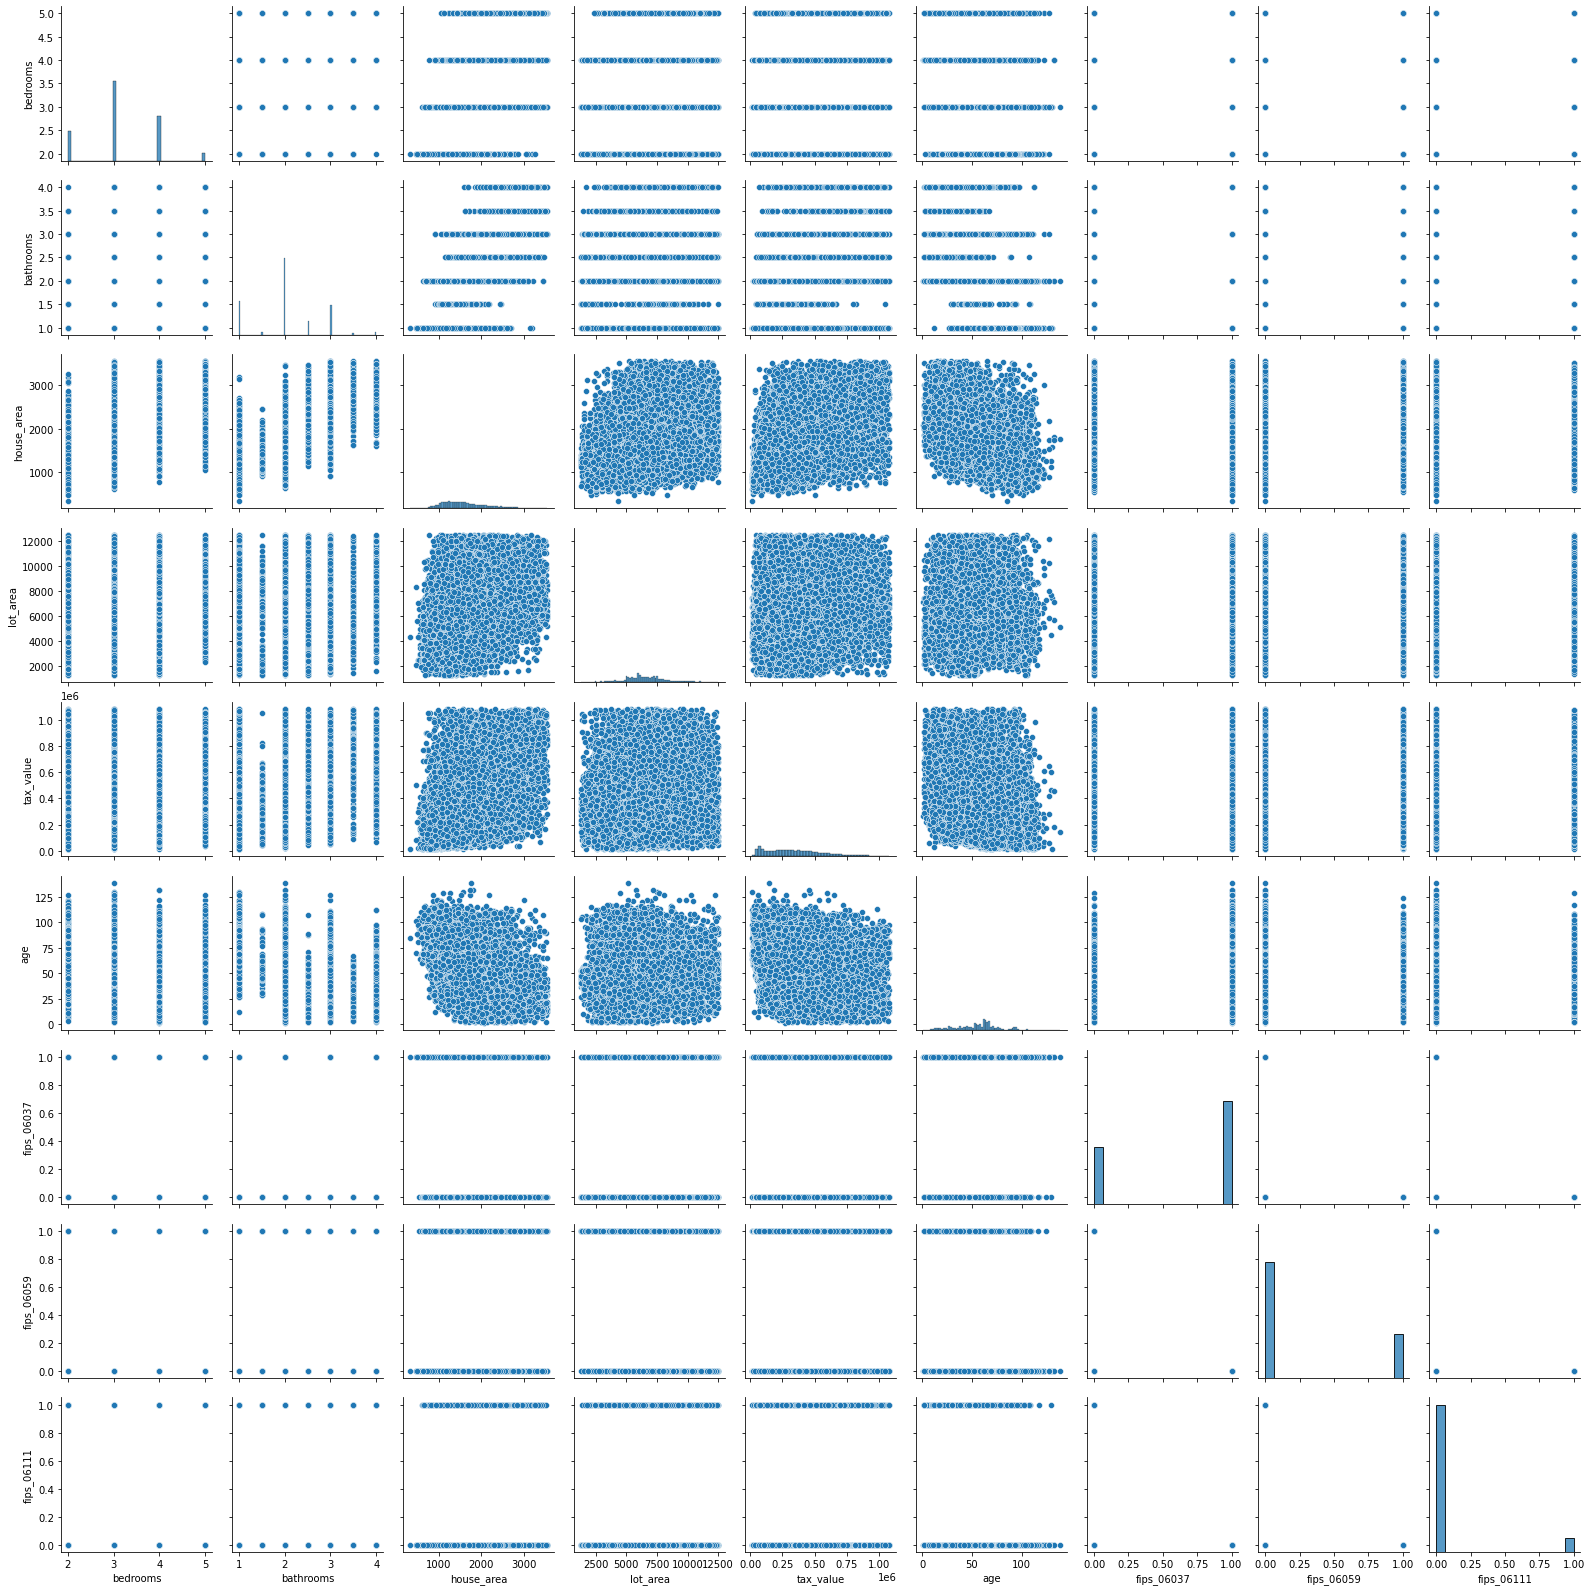

In [24]:
sns.pairplot(train)

<AxesSubplot:>

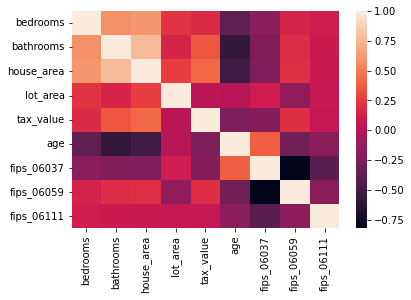

In [25]:
corr = train.corr()
sns.heatmap(corr)

In [27]:
# Strongest correlations for tax_value seem to be negative correlations with age and fips_06037
# Positive correlations are bathrooms and house_area

In [28]:
# Is there a linear relationship between tax value and physical attributes? (pearsonr)

In [29]:
from scipy.stats import pearsonr, spearmanr


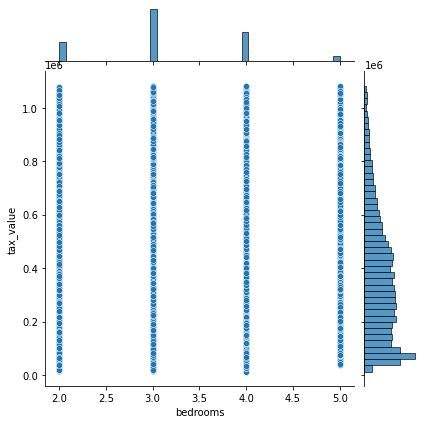

In [32]:
sns.jointplot(y='tax_value', x='bedrooms', data=train, kind='scatter')


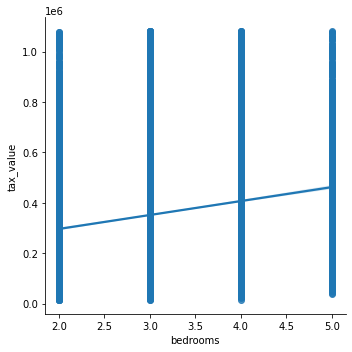

In [33]:
sns.lmplot(x='bedrooms', y='tax_value', data=train, scatter=True, hue=None, col=None)


In [34]:
# H0: There is no linear relationship between bedrooms and tax value
# HA: There is a linear relationship between bedrooms and tax value
alpha = .05

In [35]:
r, p_value = pearsonr(train.bedrooms, train.tax_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.18459027223542585
P-value: 1.4712807561914917e-175


In [36]:
# Since the p-value is below alpha we can reject the null hypothesis and conclude that there is indeed a linear
# relationship between bedrooms and tax value